# Lecture 14: Multivariate Data

```{note}
In the first few lectures of this course, we explored measures of location, dispersion, and shape to communicate the characteristics of the single variable data. In this lecture, we will explore means of communicating characteristics of multivariate data.
```

---

Multivariate data involves making two or more measurements per entity. For instance, the 2024 Indian Time Use Survey captures gender, age, marital status, education level, and employment status, among other identifier variables (NSS region, district, stratum, sub-stratum, etc.), for each individual. Further, the 2024 Indian Time Use Survey captures household size, religion, social group, land possesed, and monthly expenditure, among others including identifier variables (NSS region, district, stratum, sub-stratum, etc.), for each household.

In [33]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
options(repr.plot.width = 12, repr.plot.height = 8)

# 2024 ITUS sample individual data
url  <- "https://raw.githubusercontent.com/anmpahwa/CE5540/refs/heads/main/resources/ITUS-IND-PD.csv"
data <- read.csv(url)                           # Loading Data
str(data)                                       # Data Structure

'data.frame':	454192 obs. of  22 variables:
 $ Unique_ID         : chr  "2024-30010-1-241-17-13-11-2-2420-4-1-1" "2024-30010-1-241-17-13-11-2-2420-4-10-1" "2024-30010-1-241-17-13-11-2-2420-4-10-2" "2024-30010-1-241-17-13-11-2-2420-4-11-1" ...
 $ Unique_HH_ID      : chr  "2024-30010-1-241-17-13-11-2-2420-4-1" "2024-30010-1-241-17-13-11-2-2420-4-10" "2024-30010-1-241-17-13-11-2-2420-4-10" "2024-30010-1-241-17-13-11-2-2420-4-11" ...
 $ sector            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ stratum           : int  13 13 13 13 13 13 13 13 13 13 ...
 $ district          : int  17 17 17 17 17 17 17 17 17 17 ...
 $ Pop               : int  1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 ...
 $ day_of_week       : int  2 2 2 6 6 6 6 6 1 1 ...
 $ gender            : int  1 1 2 1 2 1 2 2 1 2 ...
 $ age               : int  45 28 25 45 43 17 21 18 45 42 ...
 $ marital_status    : int  1 2 2 2 2 1 1 1 2 2 ...
 $ education_level   : int  11 5 4 5 1 6 4 6 1 4 ...
 $ empl

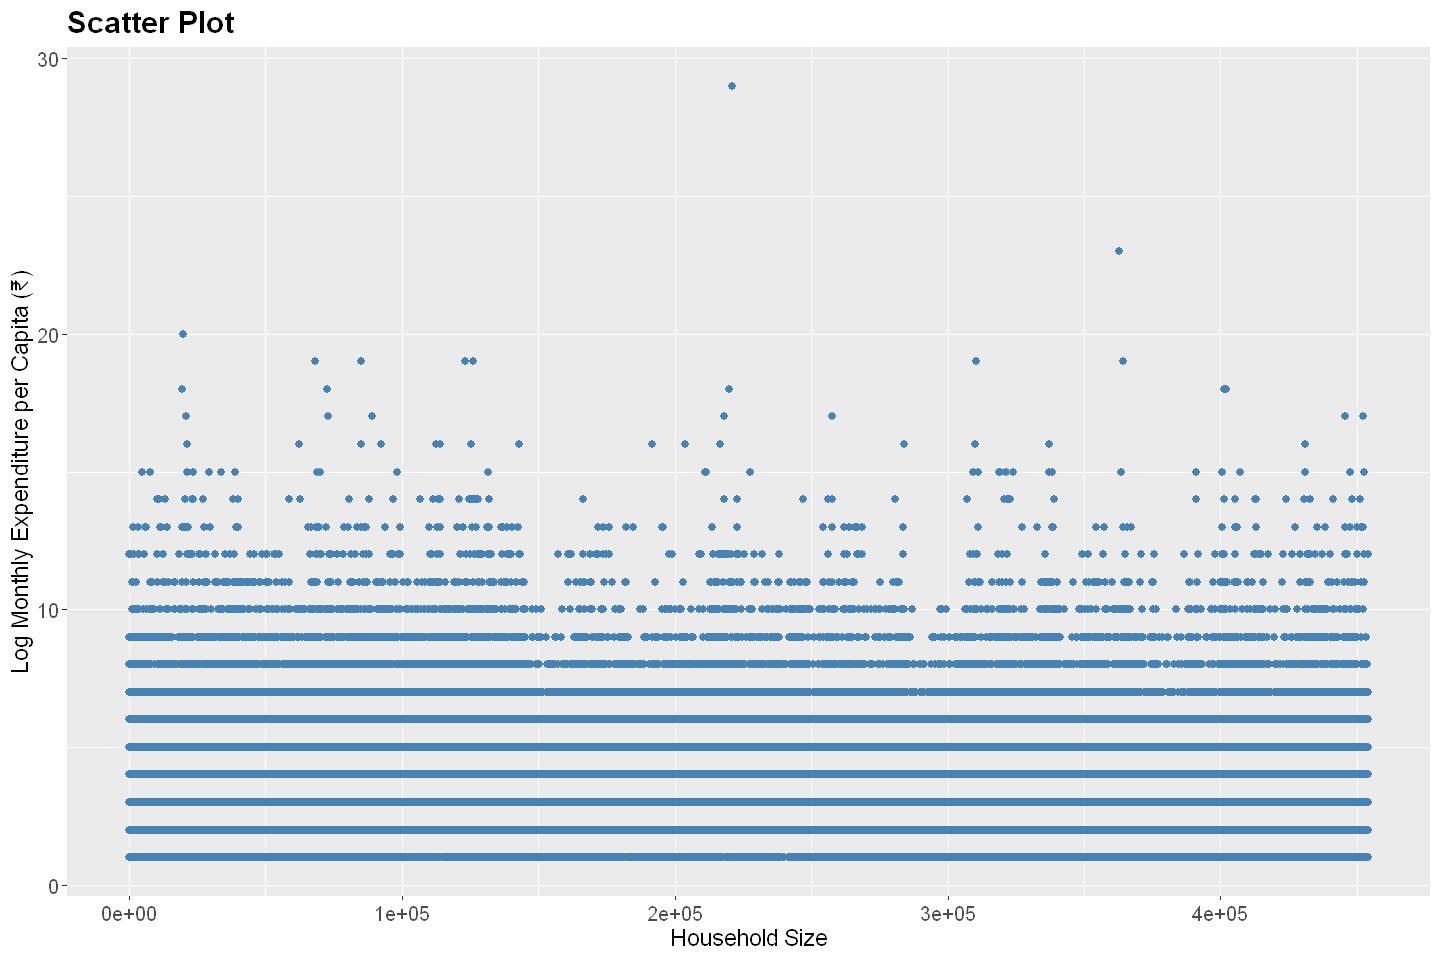

In [38]:
# Scatter Plot for Household Size
ggplot(data, aes(x = seq_along(Unique_ID), y = household_size)) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Scatter Plot",
    x = "Household Size",
    y = "Log Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

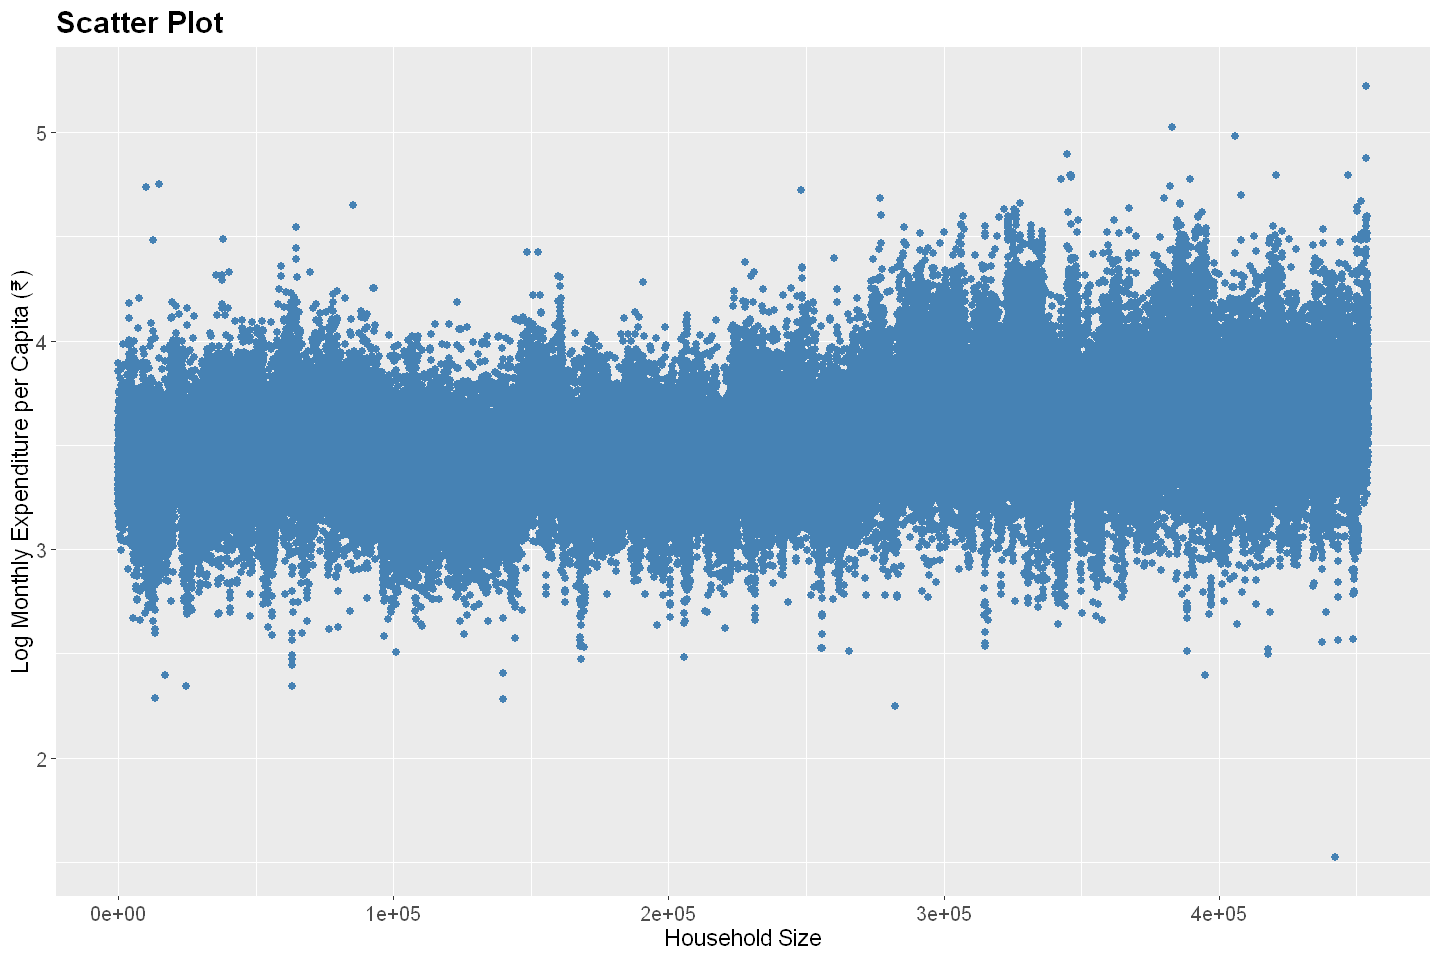

In [37]:
# Scatter Plot for Household Size for Log Monthly Expenditure per Capita (₹)
ggplot(data, aes(x = seq_along(Unique_ID), y = log10(total_expenditure / household_size))) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Scatter Plot",
    x = "Household Size",
    y = "Log Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

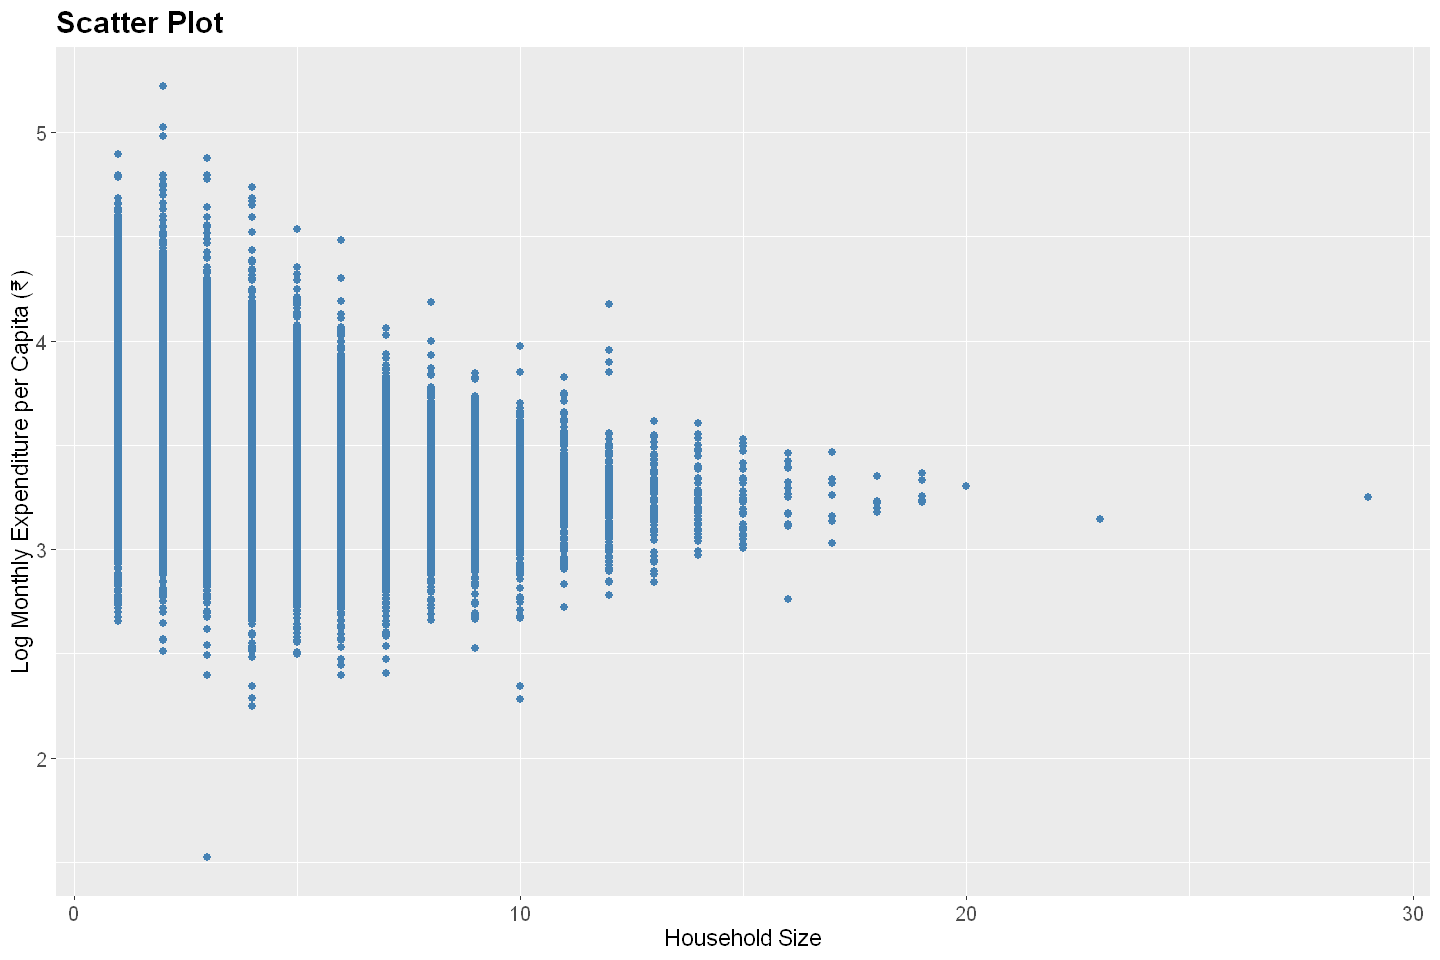

In [39]:
# Create a scatter plot
ggplot(data, aes(x = household_size, y = log10(total_expenditure / household_size))) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Scatter Plot",
    x = "Household Size",
    y = "Log Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )